# Working on Yelp Restaurants Dataset

* To see how the data is genereted by using Yelp API calls, and transformed to csv file. Go to Yelp-api folder, and put your API KEY in to config.py file, select the term "restaurants" then select "search location", and run the search.py file in your environment.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import random
import scipy.stats as st
import numpy as np
import seaborn as sns
from scipy.stats import linregress
from matplotlib.pyplot import figure
from sklearn import datasets
import matplotlib.colors as mcolors
import warnings
warnings.simplefilter(action='ignore')

In [2]:
# File to Load 
yelp_data_to_load = "data/PyRestaurants_data.csv"

In [3]:
# Read Data File and store into Pandas DataFrames
Restaurants_df = pd.read_csv(yelp_data_to_load)
Restaurants_df.head()

,id,name,phone,location.address1,location.address2,location.city,location.state,location.country,price,rating,review_count,url
0,6i7KnRylm4bhPIApDFSVCg,Dave's Hot Chicken,1.323537e+10,970 N Western Ave,NaN,Los Angeles,CA,US,$$,4.5,3132,https://www.yelp.com/biz/daves-hot-chicken-los...
1,qAAoilHU25Qr45FOQlA19g,Kang Ho-dong Baekjeong,1.213385e+10,3465 W 6th St,Ste 20,Los Angeles,CA,US,$$,4.5,4266,https://www.yelp.com/biz/kang-ho-dong-baekjeon...
2,AIhWsp8yNfKZfaX9d9Yajg,Pasta Sisters,1.323871e+10,3343 W Pico Blvd,NaN,Los Angeles,CA,US,$$,4.5,1479,https://www.yelp.com/biz/pasta-sisters-los-ang...
3,vUe6SGmCpWRbVdmj1ujMMQ,Yeon Uh,1.213568e+10,621 S Western Ave,Ste 208 B,Los Angeles,CA,US,NaN,5.0,4,https://www.yelp.com/biz/yeon-uh-los-angeles-2...
4,H9ZlIqEp930ZRniH6VRp8w,Papa Cristo's,1.323737e+10,2771 W Pico Blvd,NaN,Los Angeles,CA,US,$$,4.5,1911,https://www.yelp.com/biz/papa-cristos-los-ange...


## Cleaning Data
* Rename column headings
* Delet duplicate rows if they are avaliable 
* Drop null values

In [4]:
Restaurants_df.columns

Index(['id', 'name', 'phone', 'location.address1', 'location.address2',
       'location.city', 'location.state', 'location.country', 'price',
       'rating', 'review_count', 'url'],
      dtype='object')

In [5]:
# Using .rename(columns={}) in order to rename columns
renamed_df = Restaurants_df.rename(columns={"id":"Restaurant ID", "name":"Restaurant Name", "phone":"Phone Number","location.address1":"Adress",
                                          "location.address2":"Address Two","location.city":"City","location.state":"State","location.country":"Country","location.state":"State",
                                           "price":"Price","rating":"Rating","review_count":"Review Count","url":"Url"})
renamed_df.head()



,Restaurant ID,Restaurant Name,Phone Number,Adress,Address Two,City,State,Country,Price,Rating,Review Count,Url
0,6i7KnRylm4bhPIApDFSVCg,Dave's Hot Chicken,1.323537e+10,970 N Western Ave,NaN,Los Angeles,CA,US,$$,4.5,3132,https://www.yelp.com/biz/daves-hot-chicken-los...
1,qAAoilHU25Qr45FOQlA19g,Kang Ho-dong Baekjeong,1.213385e+10,3465 W 6th St,Ste 20,Los Angeles,CA,US,$$,4.5,4266,https://www.yelp.com/biz/kang-ho-dong-baekjeon...
2,AIhWsp8yNfKZfaX9d9Yajg,Pasta Sisters,1.323871e+10,3343 W Pico Blvd,NaN,Los Angeles,CA,US,$$,4.5,1479,https://www.yelp.com/biz/pasta-sisters-los-ang...
3,vUe6SGmCpWRbVdmj1ujMMQ,Yeon Uh,1.213568e+10,621 S Western Ave,Ste 208 B,Los Angeles,CA,US,NaN,5.0,4,https://www.yelp.com/biz/yeon-uh-los-angeles-2...
4,H9ZlIqEp930ZRniH6VRp8w,Papa Cristo's,1.323737e+10,2771 W Pico Blvd,NaN,Los Angeles,CA,US,$$,4.5,1911,https://www.yelp.com/biz/papa-cristos-los-ange...


In [6]:
# Remove duplicate values
remove_duplicates=renamed_df.drop_duplicates()

# Drop null values from Restaurant Name, City,Rating , Review Count,Price coloumns  and store cleaned data

dronull_df=remove_duplicates.dropna(subset=['Restaurant Name','City','Rating','Review Count','Price'])
dronull_df.head()

,Restaurant ID,Restaurant Name,Phone Number,Adress,Address Two,City,State,Country,Price,Rating,Review Count,Url
0,6i7KnRylm4bhPIApDFSVCg,Dave's Hot Chicken,1.323537e+10,970 N Western Ave,NaN,Los Angeles,CA,US,$$,4.5,3132,https://www.yelp.com/biz/daves-hot-chicken-los...
1,qAAoilHU25Qr45FOQlA19g,Kang Ho-dong Baekjeong,1.213385e+10,3465 W 6th St,Ste 20,Los Angeles,CA,US,$$,4.5,4266,https://www.yelp.com/biz/kang-ho-dong-baekjeon...
2,AIhWsp8yNfKZfaX9d9Yajg,Pasta Sisters,1.323871e+10,3343 W Pico Blvd,NaN,Los Angeles,CA,US,$$,4.5,1479,https://www.yelp.com/biz/pasta-sisters-los-ang...
4,H9ZlIqEp930ZRniH6VRp8w,Papa Cristo's,1.323737e+10,2771 W Pico Blvd,NaN,Los Angeles,CA,US,$$,4.5,1911,https://www.yelp.com/biz/papa-cristos-los-ange...
5,BEItepse0gBSfkJ4sb_k-g,Hae Ha Heng Thai Bistro,1.213388e+10,301 S Western Ave,Ste 209,Los Angeles,CA,US,$$,4.5,1183,https://www.yelp.com/biz/hae-ha-heng-thai-bist...


In [7]:
# Drop Coloumns irrelevant for our analysis 
to_drop =["Address Two","Url","Phone Number"]

cleaned_df=dronull_df.drop(columns=to_drop)
cleaned_df

,Restaurant ID,Restaurant Name,Adress,City,State,Country,Price,Rating,Review Count
0,6i7KnRylm4bhPIApDFSVCg,Dave's Hot Chicken,970 N Western Ave,Los Angeles,CA,US,$$,4.5,3132
1,qAAoilHU25Qr45FOQlA19g,Kang Ho-dong Baekjeong,3465 W 6th St,Los Angeles,CA,US,$$,4.5,4266
2,AIhWsp8yNfKZfaX9d9Yajg,Pasta Sisters,3343 W Pico Blvd,Los Angeles,CA,US,$$,4.5,1479
4,H9ZlIqEp930ZRniH6VRp8w,Papa Cristo's,2771 W Pico Blvd,Los Angeles,CA,US,$$,4.5,1911
5,BEItepse0gBSfkJ4sb_k-g,Hae Ha Heng Thai Bistro,301 S Western Ave,Los Angeles,CA,US,$$,4.5,1183
...,...,...,...,...,...,...,...,...,...
4262,-0T0jfPnuBRdpNTXpOQZcA,Tim Hortons,9970 Highway 48,Markham,ON,CA,$,1.5,7
4265,7H1tFPOWp_iO4LVvQ1w1Wg,Tim Hortons,550 Bur Oak Avenue,Markham,ON,CA,$,3.5,4
4266,3Wk0eWZKyw7oSFwIUhAf2g,A&W,5000 Highway 7,Markham,ON,CA,$,2.5,9
4268,Wea4rL67vSpL5-mU3wLIdg,Mr Sub,5990 Av 16th,Markham,ON,CA,$$$,1.0,1


## Yelp Restaurants data summary

* Summary statistics

* Total number of Restaurants

* Total number of cities

* The average review_count 

* The avarage rating 

* Percentage of Restaurants getting rating greater than 4

* Percentage of Restaurants getting review count greater than 1142

* Percentage of Restaurants getting rating less than 2

* Percentage of Restaurants getting review count less than 500

* some plot here 

In [8]:
# Summary statistics
cleaned_df.describe()

,Rating,Review Count
count,3518.000000,3518.000000
mean,3.940875,457.220296
std,0.468423,710.508857
min,1.000000,1.000000
25%,3.500000,103.000000
50%,4.000000,242.000000
75%,4.000000,526.500000
max,5.000000,12277.000000


In [9]:
# Total Number of Restaurants 
Restaurant_total_number=cleaned_df["Restaurant Name"].count()
Restaurant_total_number

3518

In [10]:
# Total Number of cities 
total_cities=len(cleaned_df["City"].unique())
total_cities

21

In [11]:
# The average rating
average_rating= cleaned_df["Rating"].mean()
average_rating

3.9408754974417284

In [12]:
# The average review_count
average_review_count= cleaned_df["Review Count"].mean()
average_review_count

457.22029562251277

In [13]:
# The percentage of Restaurants geting rating greater than 4

restaurant_top_rating = cleaned_df.loc[cleaned_df["Rating"] > 4]

number_restaurant_top_rating = restaurant_top_rating["Restaurant Name"].count()

percent_restaurant_top_rating = (number_restaurant_top_rating/Restaurant_total_number) * 100

percent_restaurant_top_rating

23.2802728823195

In [14]:
# The percentage of Restaurants geting Review Count greater than 4142

restaurant_top_review= cleaned_df.loc[cleaned_df["Review Count"] >750]

number_restaurant_top_review = restaurant_top_review["Restaurant Name"].count()

percent_restaurant_top_review= (number_restaurant_top_review/Restaurant_total_number) * 100

percent_restaurant_top_review

16.25923820352473

In [15]:
# The percentage of Restaurants geting rating less than 2

restaurant_bottom_rating = cleaned_df.loc[cleaned_df["Rating"] <=3]

number_restaurant_bottom_rating = restaurant_bottom_rating["Restaurant Name"].count()

percent_restaurant_bottom_rating = (number_restaurant_bottom_rating/Restaurant_total_number) * 100

percent_restaurant_bottom_rating

6.594656054576465

In [16]:
# The percentage of Restaurants geting Review Count less than 500

restaurant_bottom_review= cleaned_df.loc[cleaned_df["Review Count"] < 100]

number_restaurant_bottom__review = restaurant_bottom_review["Restaurant Name"].count()

percent_restaurant_bottom__review= (number_restaurant_bottom__review/Restaurant_total_number) * 100

percent_restaurant_bottom__review

24.332006822057988

In [17]:
# The percentage of Restaurants geting Review Count greater than 4142 & rating greater than 4 (Best Restaurants)

Best_restaurants = cleaned_df[(cleaned_df['Review Count'] >750) & (cleaned_df['Rating'] > 4)]['Restaurant Name'].count()/Restaurant_total_number*100
Best_restaurants


3.2973280272882324

In [18]:
# The percentage of Restaurants pricing under 10 $ (labled as "$" in the dataset)

restaurant_pricing_under_10= cleaned_df.loc[cleaned_df["Price"]=="$"]

restaurant_count_pricing_under_10 = restaurant_pricing_under_10["Restaurant Name"].count()

percent_restaurant_pricing_under_10= (restaurant_count_pricing_under_10/Restaurant_total_number) * 100

percent_restaurant_pricing_under_10

23.052870949403072

In [19]:
# The percentage of Restaurants pricing between $11-$30 (labled as "$$" in the dataset)

restaurant_pricing_bw_11_30= cleaned_df.loc[cleaned_df["Price"]=="$$"]

restaurant_count_pricing_bw_11_30 = restaurant_pricing_bw_11_30["Restaurant Name"].count()

percent_restaurant_pricing_bw_11_30= (restaurant_count_pricing_bw_11_30/Restaurant_total_number) * 100

percent_restaurant_pricing_bw_11_30

65.52018192154632

In [20]:
# The percentage of Restaurants pricing between $31-$60 (labled as "$$$" in the dataset)

restaurant_pricing_bw_31_60= cleaned_df.loc[cleaned_df["Price"]=="$$$"]

restaurant_count_pricing_bw_31_60 = restaurant_pricing_bw_31_60["Restaurant Name"].count()

percent_restaurant_pricing_bw_31_60= (restaurant_count_pricing_bw_31_60/Restaurant_total_number) * 100

percent_restaurant_pricing_bw_31_60

9.181353041500854

In [21]:
# The percentage of Restaurants pricing above$60 (labled as "$$$$" in the dataset)

restaurant_pricing_above_60= cleaned_df.loc[cleaned_df["Price"]=="$$$$"]

restaurant_count_pricing_above_60 = restaurant_pricing_above_60["Restaurant Name"].count()

percent_restaurant_pricing_bw__above_60= (restaurant_count_pricing_above_60/Restaurant_total_number) * 100

percent_restaurant_pricing_bw__above_60

2.2455940875497444

In [22]:
# Value counts for price ranges and create a DataFrame
count_pricing =cleaned_df['Price'].value_counts().rename_axis('Restaurant Price Range').reset_index(name='Restaurant Counts')
pricing_df=count_pricing.set_index('Restaurant Price Range')
pricing_df.rename(index={'$':'Under $10','$$':'Between $11-30','$$$':'Between $31-60','$$$$':'Above $60'},inplace=True)
pricing_df

,Restaurant Counts
Restaurant Price Range,
Between $11-30,2305
Under $10,811
Between $31-60,323
Above $60,79


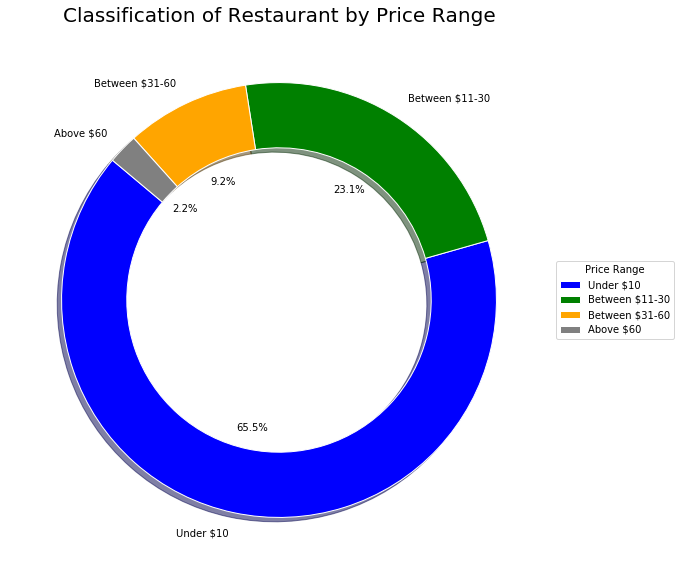

In [58]:

# Create Labels for the sections of the pie
labels = ["Under $10","Between $11-30","Between $31-60","Above $60"]

colors = ['blue','green','orange','gray']

fig, ax = plt.subplots(figsize=(15, 10))
size = 0.3
cmap = plt.get_cmap("tab20c")
ax.pie(pricing_df, radius=1,labels=labels,colors=colors,wedgeprops=dict(width=size, edgecolor='w'),autopct="%1.1f%%",shadow=True, startangle=140)
plt.title('Classification of Restaurant by Price Range',fontsize = 20)
ax.legend(title="Price Range",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

In [24]:
# Create a dataframe to hold the above results

restaurants_summary = pd.DataFrame({
    "Total Restaurant Number": Restaurant_total_number,
    "Total Number of Cities": f"{total_cities:,}",
    "Avarage Rating": f"{average_rating:,.2f}",
    "The Average Review Count": f"{average_review_count:.6f}",
    "% Restaurants Top Rating": f"{percent_restaurant_top_rating:.6f}%",
    "% Restaurants Bottom Rating": f"{percent_restaurant_bottom_rating:.2f}%",
    "% Restaurants Top Rating": f"{percent_restaurant_top_rating:.6f}%",
    "% Restaurants Bottom Rating": f"{percent_restaurant_bottom_rating:.2f}%",
    "% Restaurants Top Review Count": f"{percent_restaurant_top_review:.6f}%",
    "% Restaurants Bottom Review Count": f"{percent_restaurant_bottom__review:.2f}%",
    "% Best Restaurants": f"{Best_restaurants: .6f}%"
  
    
    
}, index=[0])

restaurants_summary


,Total Restaurant Number,Total Number of Cities,Avarage Rating,The Average Review Count,% Restaurants Top Rating,% Restaurants Bottom Rating,% Restaurants Top Review Count,% Restaurants Bottom Review Count,% Best Restaurants
0,3518,21,3.94,457.220296,23.280273%,6.59%,16.259238%,24.33%,3.297328%


In [25]:
Restaurants_Pricing_table = pd.DataFrame({
    "Total Restaurant Pricing Under $10":f"{restaurant_count_pricing_under_10:,}",
    "Total Restaurant Pricing $11-30": f"{restaurant_count_pricing_bw_11_30:,}",
    "Total Restaurant Pricing $31-60": f"{restaurant_count_pricing_bw_31_60:,}",
    "Total Restaurant Pricing Above $60": f"{restaurant_count_pricing_above_60:,}",
    "% Pricing Under $10": f"{percent_restaurant_pricing_under_10:.2f}%",
    "% Pricing between $11-30": f"{percent_restaurant_pricing_bw_11_30:.2f}%",
    "% Pricing between $31-60": f"{percent_restaurant_pricing_bw_31_60:.2f}%",
    "% Pricing above $60": f"{percent_restaurant_pricing_bw__above_60:.2f}%",
}, index=[0])

Restaurants_Pricing_table

,Total Restaurant Pricing Under $10,Total Restaurant Pricing $11-30,Total Restaurant Pricing $31-60,Total Restaurant Pricing Above $60,% Pricing Under $10,% Pricing between $11-30,% Pricing between $31-60,% Pricing above $60
0,811,"2,305",323,79,23.05%,65.52%,9.18%,2.25%


In [26]:
# Function to generate summary stats for numeric columns in dataset/dataframe.
def SummaryStats(column, cleaned_df):
    mean_numpy = np.mean(cleaned_df[column])
    median_numpy = np.median(cleaned_df[column])
    min_numpy = np.min(cleaned_df[column])
    max_numpy = np.max(cleaned_df[column])
    std_numpy = np.std(cleaned_df[column])
    var_numpy = np.var(cleaned_df[column])
    sem_numpy = cleaned_df[column].sem()

    summary_df = pd.DataFrame({ f"Average Number of {column}":round(mean_numpy,2),
                                f"Median Number of {column}":round(median_numpy,2),
                                f"Minimum of {column}":round(min_numpy,2),
                                f"Maximum of {column}":round(max_numpy,2),
                                f"Standard Deviation of {column}":round(mean_numpy,2),
                                f"Variance of {column}":round(median_numpy,2),
                                f"Standard Error of Mean of {column}":round(sem_numpy,2)},index = [0])

    return summary_df

# Function to generate histogram
def Histogram(column, cleaned_df, number_bins, title):
    plt.figure(figsize=(12, 5))
    plt.hist(cleaned_df[column], bins=number_bins)
    plt.xlabel(f'Number of {column}')
    plt.ylabel('Number of Restaurants')
    plt.title(title)
    plt.grid()
    plt.show()

In [27]:
# Summary table for star rating

SummaryStats("Rating", cleaned_df)

,Average Number of Rating,Median Number of Rating,Minimum of Rating,Maximum of Rating,Standard Deviation of Rating,Variance of Rating,Standard Error of Mean of Rating
0,3.94,4.0,1.0,5.0,3.94,4.0,0.01


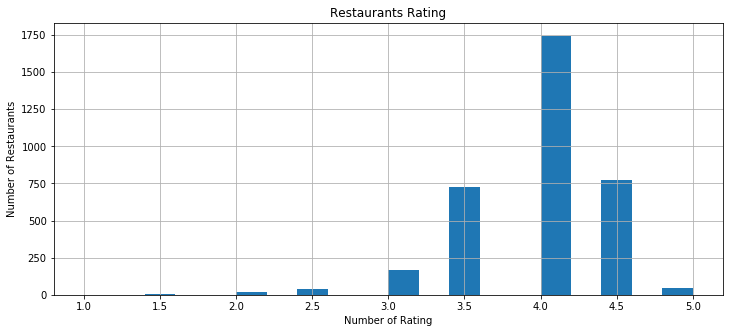

In [28]:
# Characterize the rating data by using histogram.
Histogram("Rating", cleaned_df,20, title="Restaurants Rating")

In [29]:
# Summary table for the Review Count data by using histogram.

SummaryStats("Review Count", cleaned_df)

,Average Number of Review Count,Median Number of Review Count,Minimum of Review Count,Maximum of Review Count,Standard Deviation of Review Count,Variance of Review Count,Standard Error of Mean of Review Count
0,457.22,242.0,1,12277,457.22,242.0,11.98


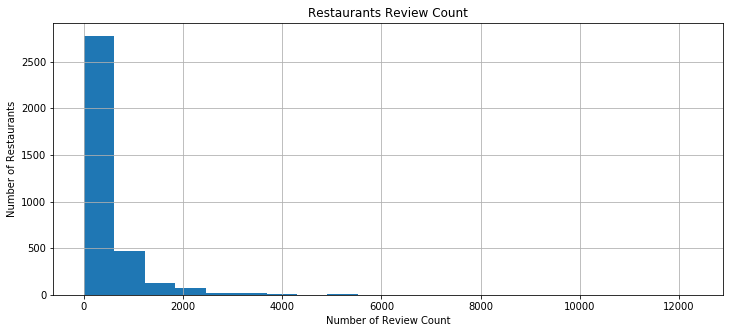

In [30]:
# Characterize the Review Count data by using histogram.
Histogram("Review Count", cleaned_df,20, title="Restaurants Review Count")

## City Summery 

* overview table that summarizes Restaurants in each cities 


## Price by resturants Rating 

## Review count by cities


## Rating in each cities

## Top resturants

## Bottom resturants

# Bar and Pie Charts


In [14]:
# Generate a bar plot showing the total number of resturants in each cities 

In [15]:
#  Generate a pie plot showing the distribution resturants 1 to 5

## Quartiles, Outliers and Boxplots

In [16]:
# Rating of each resturants across the four cities 

# Scatter plot

In [17]:
# Generate a scatter plot of review count versus rating volume for each cities 

# Correlation and Regression

In [18]:
# Correlation between review count and star rating

In [19]:
# Linear regression between review count and star rating